## 使用TensorFlow建立多层感知器，训练模型，评估模型的准确率，然后使用训练完成的模型来识别MNIST手写数字，并在尝试将模型加宽，加深以提高准确率

## 1. TensorFlow多层感知器介绍
### 建立如下所示的多层感知器模型

![](./lesson18/1.jpg)

### 具体步骤说明

![](./lesson18/2.jpg)

## 2. 数据准备

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets('data', one_hot=True)

F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\ten

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print('train: ', mnist.train.images.shape, ', labels: ', mnist.train.labels.shape)
print('validation: ', mnist.validation.images.shape, ', labels: ', mnist.validation.labels.shape)
print('test: ', mnist.test.images.shape, ', labels: ', mnist.test.labels.shape)

train:  (55000, 784) , labels:  (55000, 10)
validation:  (5000, 784) , labels:  (5000, 10)
test:  (10000, 784) , labels:  (10000, 10)


## 3. 建立模型

### TensorFlow和Keras建立模型的方式有所不同，说明如下：
- #### keras建立模型：只需要使用model = Sequential()建立线性堆叠模型，在使用model.add方法将各个神经网络层加入模型即可
- #### TensorFlow建立模型： 必须自定义layer函数（处理张量运算），然后使用layer函数构建多层感知器

In [2]:
"""
1. 建立 layer函数
"""
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random.normal([input_dim, output_dim]))
    b = tf.Variable(tf.random.normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
"""
2 建立输入层
使用tf.placeholder方法建立输入层（x）, placeholder是TensorFlow“计算图”的输入，在后续训练时传入数据
"""
x = tf.placeholder('float', [None, 784])

In [5]:
"""
3.建立隐藏层
"""
h1 = layer(output_dim=256, input_dim=784, inputs=x, activation=tf.nn.relu)

In [6]:
"""
4.建立输出层
 隐藏层的输出作为输出层的输入
"""
y_predict = layer(output_dim=10, input_dim=256, inputs=h1, activation=None)

## 4.定义训练方式

### 以下说明Keras和TensorFlow训练方式的不同
- #### Keras定义训练方式：只需要使用model.compile设置损失函数，优化器，并使用metrics设置评估模型的方式
- #### TensorFlow定义训练方式：必须自行定义损失函数的公式、优化器和设置参数，并定义评估模型准确率的公式

In [7]:
"""
1. 建立训练数据的真实值的label
"""
y_label = tf.placeholder('float', [None, 10])

In [8]:
"""
2.定义损失函数
在深度学习模型的训练中，使用cross_entropy交叉熵训练的效果比较好
"""
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



![](./lesson18/3.jpg)

In [9]:
"""
3. 定义优化器
"""
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

![](./lesson18/4.jpg)

## 5. 定义评估模型准确率的方式

### 训练完成后，我们希望能够评估模型的准确率。在TensorFlow必须定义评估模型准确率的方式

In [10]:
"""
步骤1：计算每一项数据是否预测正确
"""
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))

![](./lesson18/5.jpg)

In [11]:
"""
步骤2：计算预测正确结果的平均值
 将之前的correct_prediction进行平均运算。
"""
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

## 6.进行训练

### TensorFlow和Keras进行训练的比较如下
- #### Keras进行训练：只需要使用model.fit就可以开始训练。
- #### TensorFlow进行训练：必须编写程序来控制训练的每一个过程。

#### 使用TensorFlow进行训练，训练数据供55000项，每一批次100项，要将所有数据训练完成需要550个批次，当所有的数据全部训练完成，称为完成一个训练周期。我们将执行15个训练周期，尽量是误差降低，并且提高准确率。

![](./lesson18/6.jpg)

In [12]:
"""
1. 定义训练参数
"""
trainEpoches = 15
batchSize = 100
loss_List = []; epoch_list = []; accuracy_list = []
from time import time

startTime = time()
session = tf.Session()
session.run(tf.global_variables_initializer())

In [13]:
"""
2. 进行训练
"""
total_Batchs = int(mnist.train.num_examples / batchSize)
for epoch in range(trainEpoches):
    for i in range(total_Batchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batchSize)
        session.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
    loss, acc = session.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_List.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch: ', '%02d' %(epoch+1), ', Loss=', '{:.9f}'.format(loss), ', Accuracy='+str(acc))
    
duration = time() - startTime
print('Train finished takes: ', duration)

Train Epoch:  01 , Loss= 6.086976528 , Accuracy=0.8452
Train Epoch:  02 , Loss= 3.907341480 , Accuracy=0.891
Train Epoch:  03 , Loss= 3.012500048 , Accuracy=0.9068
Train Epoch:  04 , Loss= 2.561098814 , Accuracy=0.9186
Train Epoch:  05 , Loss= 2.220691681 , Accuracy=0.9214
Train Epoch:  06 , Loss= 1.918957472 , Accuracy=0.9306
Train Epoch:  07 , Loss= 1.734117627 , Accuracy=0.9348
Train Epoch:  08 , Loss= 1.606866837 , Accuracy=0.9368
Train Epoch:  09 , Loss= 1.538544893 , Accuracy=0.938
Train Epoch:  10 , Loss= 1.496632576 , Accuracy=0.9376
Train Epoch:  11 , Loss= 1.428768277 , Accuracy=0.9408
Train Epoch:  12 , Loss= 1.343892336 , Accuracy=0.9412
Train Epoch:  13 , Loss= 1.341390371 , Accuracy=0.9416
Train Epoch:  14 , Loss= 1.297633171 , Accuracy=0.9478
Train Epoch:  15 , Loss= 1.361977935 , Accuracy=0.944
Train finished takes:  34.94735670089722


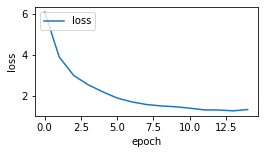

In [14]:
"""
3. 画出误差执行结果
"""
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_List, label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss'], loc='upper left')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[6.0869765, 3.9073415, 3.0125, 2.5610988, 2.2206917, 1.9189575, 1.7341176, 1.6068668, 1.5385449, 1.4966326, 1.4287683, 1.3438923, 1.3413904, 1.2976332, 1.3619779]
[0.8452, 0.891, 0.9068, 0.9186, 0.9214, 0.9306, 0.9348, 0.9368, 0.938, 0.9376, 0.9408, 0.9412, 0.9416, 0.9478, 0.944]


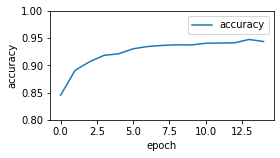

In [15]:
"""
4. 画出准确率的执行结果
"""
print(epoch_list)
print(loss_List)
print(accuracy_list)
plt.plot(epoch_list, accuracy_list, label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## 7. 评估模型的准确率

### 之前已经完成了训练，现在要使用test测试数据集，评估模型的准确率

In [16]:
print('Accuracy: ', session.run(accuracy, feed_dict={x:mnist.test.images, y_label: mnist.test.labels}))

Accuracy:  0.942


## 8.进行预测

### 前面已经建立了模型，并且完成了模型的训练，准确率还达到可以接受的0.94，接下来进行预测

In [17]:
"""
执行预测
"""
prediction_result = session.run(tf.argmax(y_predict, 1), feed_dict={x: mnist.test.images})

In [18]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [3]:
import numpy as np
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(np.reshape(images[idx], (28, 28)),cmap='binary')
        title = 'label='+ str(np.argmax(labels[idx]))
        if len(prediction) >0:
            title += ', predict='+ str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

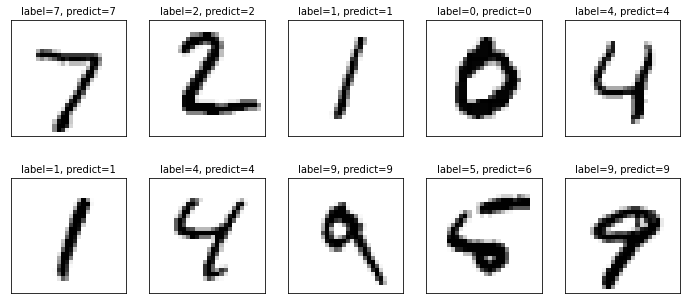

In [20]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

## 9. 隐藏层加入更多神经元

### 为了增加模型的准确率，将原本256个神经元的隐藏层改为1000

In [4]:
# 建立输入层1
x = tf.placeholder('float', [None, 784])
# 建立隐藏层1
h1 = layer(output_dim=1000, input_dim=784, inputs=x, activation=tf.nn.relu)
# 建立输出层
y_predict = layer(output_dim=10, input_dim=1000, inputs=h1, activation=None)
y_label = tf.placeholder('float', [None, 10])
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)
"""
步骤1：计算每一项数据是否预测正确
"""
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
"""
步骤2：计算预测正确结果的平均值
 将之前的correct_prediction进行平均运算。
"""
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
trainEpoches = 15
batchSize = 100
loss_List = []; epoch_list = []; accuracy_list = []
from time import time

startTime = time()
session = tf.Session()
session.run(tf.global_variables_initializer())

total_Batchs = int(mnist.train.num_examples / batchSize)
for epoch in range(trainEpoches):
    for i in range(total_Batchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batchSize)
        session.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
    loss, acc = session.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_List.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch: ', '%02d' %(epoch+1), ', Loss=', '{:.9f}'.format(loss), ', Accuracy='+str(acc))
    
duration = time() - startTime
print('Train finished takes: ', duration)

Train Epoch:  01 , Loss= 8.615473747 , Accuracy=0.8864
Train Epoch:  02 , Loss= 5.585938454 , Accuracy=0.9154
Train Epoch:  03 , Loss= 4.443417072 , Accuracy=0.93
Train Epoch:  04 , Loss= 3.951128960 , Accuracy=0.9354
Train Epoch:  05 , Loss= 3.533078909 , Accuracy=0.9372
Train Epoch:  06 , Loss= 3.132580280 , Accuracy=0.9446
Train Epoch:  07 , Loss= 3.031724215 , Accuracy=0.9454
Train Epoch:  08 , Loss= 2.890598774 , Accuracy=0.9482
Train Epoch:  09 , Loss= 2.749699116 , Accuracy=0.951
Train Epoch:  10 , Loss= 2.589007139 , Accuracy=0.9512
Train Epoch:  11 , Loss= 2.407113314 , Accuracy=0.955
Train Epoch:  12 , Loss= 2.868568659 , Accuracy=0.9508
Train Epoch:  13 , Loss= 2.467785835 , Accuracy=0.9548
Train Epoch:  14 , Loss= 2.608200788 , Accuracy=0.9546
Train Epoch:  15 , Loss= 2.396567106 , Accuracy=0.957
Train finished takes:  114.18840527534485


In [6]:
print('Accuracy: ', session.run(accuracy, feed_dict={x:mnist.test.images, y_label: mnist.test.labels}))

Accuracy:  0.957


### 准确率0.95比原先的0.94稍高了一些

___

## 10. 建立包含两个隐藏层的多层感知器模型

### 为了更进一步增加模型的准确率，本次建立两个隐藏层

In [7]:
# 建立输入层1
x = tf.placeholder('float', [None, 784])
# 建立隐藏层1
h1 = layer(output_dim=1000, input_dim=784, inputs=x, activation=tf.nn.relu)
"""
增加隐藏层2
"""
h2 = layer(output_dim=1000, input_dim=1000, inputs=h1, activation=tf.nn.relu)
# 建立输出层
y_predict = layer(output_dim=10, input_dim=1000, inputs=h2, activation=None)
y_label = tf.placeholder('float', [None, 10])
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)
"""
步骤1：计算每一项数据是否预测正确
"""
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
"""
步骤2：计算预测正确结果的平均值
 将之前的correct_prediction进行平均运算。
"""
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [8]:
trainEpoches = 15
batchSize = 100
loss_List = []; epoch_list = []; accuracy_list = []
from time import time

startTime = time()
session = tf.Session()
session.run(tf.global_variables_initializer())

total_Batchs = int(mnist.train.num_examples / batchSize)
for epoch in range(trainEpoches):
    for i in range(total_Batchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batchSize)
        session.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
    loss, acc = session.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_List.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch: ', '%02d' %(epoch+1), ', Loss=', '{:.9f}'.format(loss), ', Accuracy='+str(acc))
    
duration = time() - startTime
print('Train finished takes: ', duration)

Train Epoch:  01 , Loss= 123.090873718 , Accuracy=0.9242
Train Epoch:  02 , Loss= 90.454750061 , Accuracy=0.9342
Train Epoch:  03 , Loss= 68.744674683 , Accuracy=0.9446
Train Epoch:  04 , Loss= 58.131126404 , Accuracy=0.9506
Train Epoch:  05 , Loss= 63.629024506 , Accuracy=0.9504
Train Epoch:  06 , Loss= 60.120700836 , Accuracy=0.9524
Train Epoch:  07 , Loss= 50.906997681 , Accuracy=0.9588
Train Epoch:  08 , Loss= 53.213520050 , Accuracy=0.961
Train Epoch:  09 , Loss= 64.319503784 , Accuracy=0.95
Train Epoch:  10 , Loss= 53.453025818 , Accuracy=0.9626
Train Epoch:  11 , Loss= 47.631507874 , Accuracy=0.9622
Train Epoch:  12 , Loss= 48.300369263 , Accuracy=0.9646
Train Epoch:  13 , Loss= 49.463363647 , Accuracy=0.9636
Train Epoch:  14 , Loss= 47.569343567 , Accuracy=0.967
Train Epoch:  15 , Loss= 48.646762848 , Accuracy=0.9626
Train finished takes:  262.6894881725311


In [9]:
print('Accuracy: ', session.run(accuracy, feed_dict={x:mnist.test.images, y_label: mnist.test.labels}))

Accuracy:  0.9667


### 执行结果是0.96，比上次的模型又稍高了一些

### 还可以继续加深模型以提高准确率，但是多层感知器有极限，如果还要进一步提高准确率，就必须使用卷积神经网络